In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longtitude combinations
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list.
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities

cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique,then we will add it to the citites list
    if city not in cities:
        cities.append(city)
len(cities)

589

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather=requests.get(city_url).json()
        # Parse out the needed data.
        city_lat=city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date=datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that data loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | awjilah
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | beira
Processing Record 4 of Set 1 | barcelos
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | roma
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | mana
Processing Record 18 of Set 1 | jos
Processing Record 19 of Set 1 | catamarca
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | izm

Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | sairang
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | progreso
Processing Record 48 of Set 4 | san ignacio
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | kaoma
Processing Record 1 of Set 5 | westerland
Processing Record 2 of Set 5 | homer
Processing Record 3 of Set 5 | clifton
Processing Record 4 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 5 of Set 5 | nemuro
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | salina
Processing Record 10 of Set 5 | buchanan
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | toliary
City not found. Skipping...
Processing Record 13 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 5 | aksu
Processing Record 15 of Set 5 | kabinda
Processing Record 16 of

Processing Record 30 of Set 8 | sevsk
Processing Record 31 of Set 8 | paramonga
Processing Record 32 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | xining
Processing Record 35 of Set 8 | honiara
Processing Record 36 of Set 8 | bojaya
City not found. Skipping...
Processing Record 37 of Set 8 | krasnoselkup
Processing Record 38 of Set 8 | palembang
Processing Record 39 of Set 8 | san pedro
Processing Record 40 of Set 8 | iquique
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | takoradi
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | kiunga
Processing Record 45 of Set 8 | ambilobe
Processing Record 46 of Set 8 | jining
Processing Record 47 of Set 8 | la palma
Processing Record 48 of Set 8 | hohhot
Processing Record 49 of Set 8 | quatre cocos
Processing Record 50 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 9 | la ronge
Processing Record 2

Processing Record 18 of Set 12 | lohja
Processing Record 19 of Set 12 | newport
Processing Record 20 of Set 12 | rungata
City not found. Skipping...
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set 12 | ugoofaaru
Processing Record 23 of Set 12 | isangel
Processing Record 24 of Set 12 | takanosu
Processing Record 25 of Set 12 | sarangani
Processing Record 26 of Set 12 | kharp
Processing Record 27 of Set 12 | waingapu
Processing Record 28 of Set 12 | dongying
Processing Record 29 of Set 12 | wagar
Processing Record 30 of Set 12 | muzhi
Processing Record 31 of Set 12 | rio novo
Processing Record 32 of Set 12 | fare
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | san bartolome de tirajana
Processing Record 35 of Set 12 | changji
Processing Record 36 of Set 12 | praia da vitoria
Processing Record 37 of Set 12 | stepnyak
Processing Record 38 of Set 12 | nouakchott
Processing Record 39 of Set 12 | inhambane
----------------------------
Data

In [7]:
len(city_data)

548

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awjilah,29.1081,21.2869,64.26,59,89,15.61,LY,2021-04-06 21:28:41
1,Bluff,-46.6000,168.3333,54.00,85,100,4.00,NZ,2021-04-06 21:28:42
2,Beira,-19.8436,34.8389,78.01,61,0,11.48,MZ,2021-04-06 21:28:42
3,Barcelos,41.5388,-8.6151,57.00,100,0,3.11,PT,2021-04-06 21:28:21
4,Provideniya,64.3833,-173.3000,5.00,66,0,6.71,RU,2021-04-06 21:28:42
5,Roma,43.2128,-75.4557,61.00,18,1,12.66,US,2021-04-06 21:28:02
6,Los Llanos De Aridane,28.6585,-17.9182,66.20,77,0,4.61,ES,2021-04-06 21:28:43
7,Ushuaia,-54.8000,-68.3000,51.80,62,75,6.91,AR,2021-04-06 21:28:43
8,Ponta Do Sol,32.6667,-17.1000,61.00,69,13,3.00,PT,2021-04-06 21:28:43
9,Ribeira Grande,38.5167,-28.7000,62.60,77,20,4.61,PT,2021-04-06 21:25:40


In [9]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Awjilah,LY,2021-04-06 21:28:41,29.1081,21.2869,64.26,59,89,15.61
1,Bluff,NZ,2021-04-06 21:28:42,-46.6000,168.3333,54.00,85,100,4.00
2,Beira,MZ,2021-04-06 21:28:42,-19.8436,34.8389,78.01,61,0,11.48
3,Barcelos,PT,2021-04-06 21:28:21,41.5388,-8.6151,57.00,100,0,3.11
4,Provideniya,RU,2021-04-06 21:28:42,64.3833,-173.3000,5.00,66,0,6.71
5,Roma,US,2021-04-06 21:28:02,43.2128,-75.4557,61.00,18,1,12.66
6,Los Llanos De Aridane,ES,2021-04-06 21:28:43,28.6585,-17.9182,66.20,77,0,4.61
7,Ushuaia,AR,2021-04-06 21:28:43,-54.8000,-68.3000,51.80,62,75,6.91
8,Ponta Do Sol,PT,2021-04-06 21:28:43,32.6667,-17.1000,61.00,69,13,3.00
9,Ribeira Grande,PT,2021-04-06 21:25:40,38.5167,-28.7000,62.60,77,20,4.61


In [10]:
# Create the output file (CSV).
output_data_file="weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting
las=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

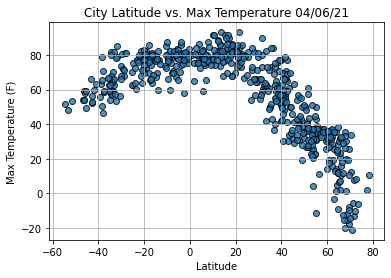

In [15]:
import time

plt.scatter(las,max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig1.png")

plt.show()

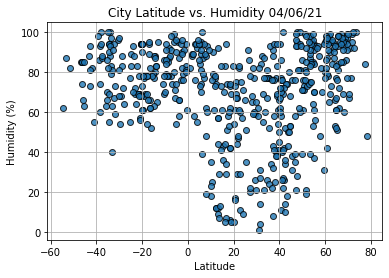

In [16]:
plt.scatter(las,humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig2.png")

plt.show()

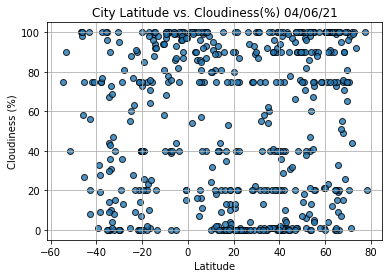

In [17]:
plt.scatter(las,cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"City Latitude vs. Cloudiness(%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig3.png")

plt.show()

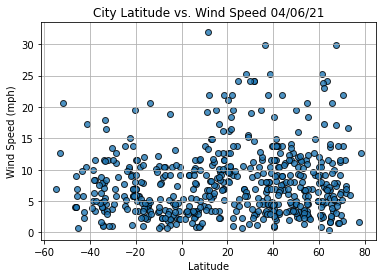

In [18]:
plt.scatter(las,wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig4.png")

plt.show()